In [1]:
%config InlineBackend.figure_formats = ['retina']  # increase resolution on retina screens
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt


sc.settings.verbosity = 2                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

%matplotlib inline

/Users/etchin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Running Scanpy version 0.2.9 on 2017-11-27 21:37.


In [2]:
adata = sc.read('maca_final_notBC',cache=True)

reading ./write/maca_final_notBC.h5


In [3]:
adata = adata[adata.smp['tissue'] == 'Pancreas',:]
tiss_meta = pd.DataFrame(np.vstack((adata.smp['Lysis Plate Batch'],adata.smp['dNTP.batch'])).T,
                         columns=['Lysis Plate Batch','dNTP.batch'],index=adata.smp_names)
tiss_meta.fillna('Unknown',inplace=True)
tiss_meta = tiss_meta.astype(str)
batch_labels = tiss_meta[['dNTP.batch','Lysis Plate Batch']].drop_duplicates()
batch_labels['batch'] = range(batch_labels.shape[0])
tiss_meta = tiss_meta.reset_index().merge(batch_labels,how='left',on=['dNTP.batch','Lysis Plate Batch'])
tiss_meta = tiss_meta.set_index('index')
tiss_meta = tiss_meta.reindex(adata.smp_names)
adata.smp['batch'] = tiss_meta['batch']

running Louvain clustering
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9947490692  0.9555860758  0.9350597262  0.9232438803
      0.8183358312  0.766263485   0.6051166654  0.5243062973  0.5120909214
      0.4572203159  0.4115378857  0.3454138637  0.3380553424 -0.3357452452]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.787) and found 8 clusters, added
    "louvain_groups", the cluster labels (adata.smp)
    "louvain_groups_order", the unique cluster labels (adata.add)
computing tSNE
    using X_pca for tSNE
    using 50 principal components
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:00:06.457) and added
    "X_tsne", tSNE coordinates (adata.smp)


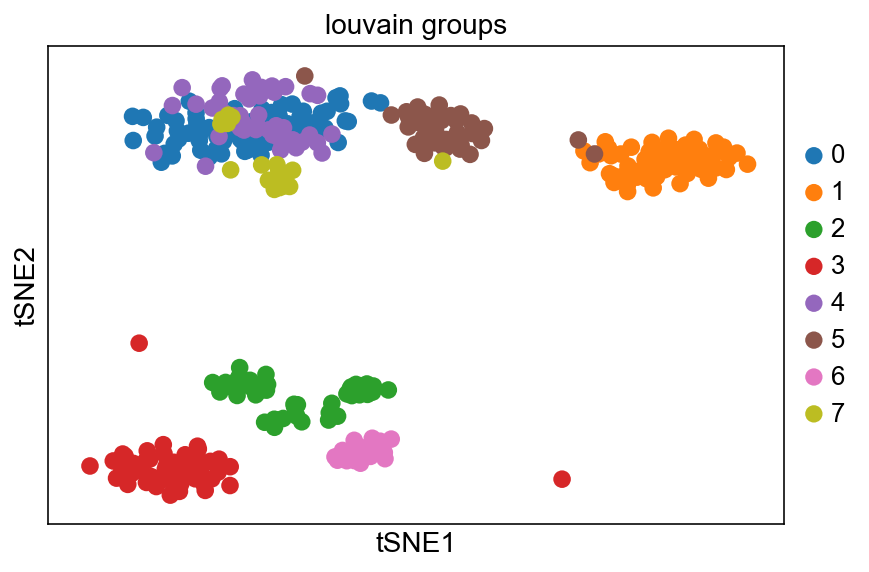

running Louvain clustering
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9950430393  0.9769569635  0.9761306643  0.9456303716
      0.9086915255  0.8969796896  0.8826717138  0.8023122549  0.7578862906
      0.697449863   0.6740353703  0.6715868711  0.6573152542  0.6503448486]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.665) and found 11 clusters, added
    "louvain_groups", the cluster labels (adata.smp)
    "louvain_groups_order", the unique cluster labels (adata.add)
computing tSNE
    using X_pca for tSNE
    using 50 principal components
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:00:11.895) and added
    "X_tsne", tSNE coordinates (adata.smp)


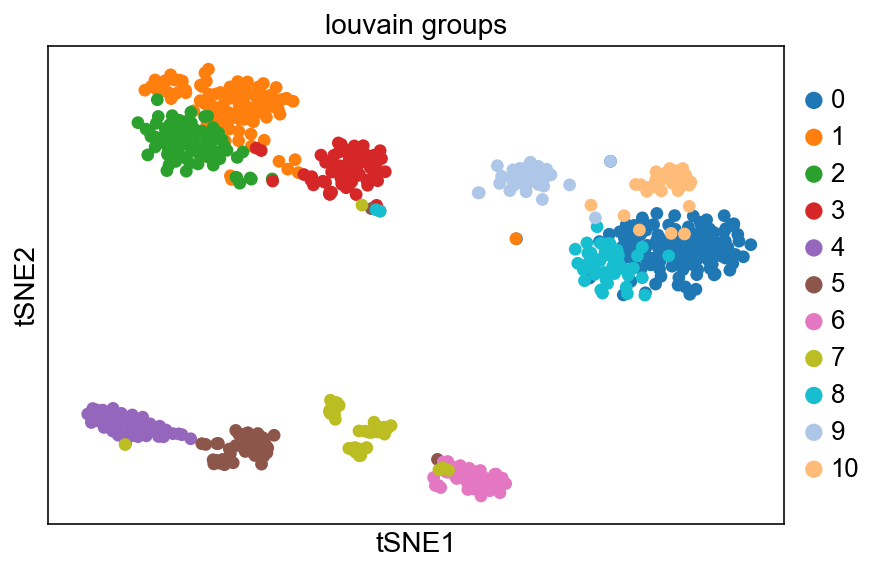

running Louvain clustering
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9953667521  0.9719641805  0.9527121186  0.9044232368
      0.8567222357  0.7357423902  0.6588457227  0.6306022406  0.5791506171
      0.5195714831  0.4480055869  0.4274415374  0.416334033   0.3547060192]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.432) and found 7 clusters, added
    "louvain_groups", the cluster labels (adata.smp)
    "louvain_groups_order", the unique cluster labels (adata.add)
computing tSNE
    using X_pca for tSNE
    using 50 principal components
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:00:06.283) and added
    "X_tsne", tSNE coordinates (adata.smp)


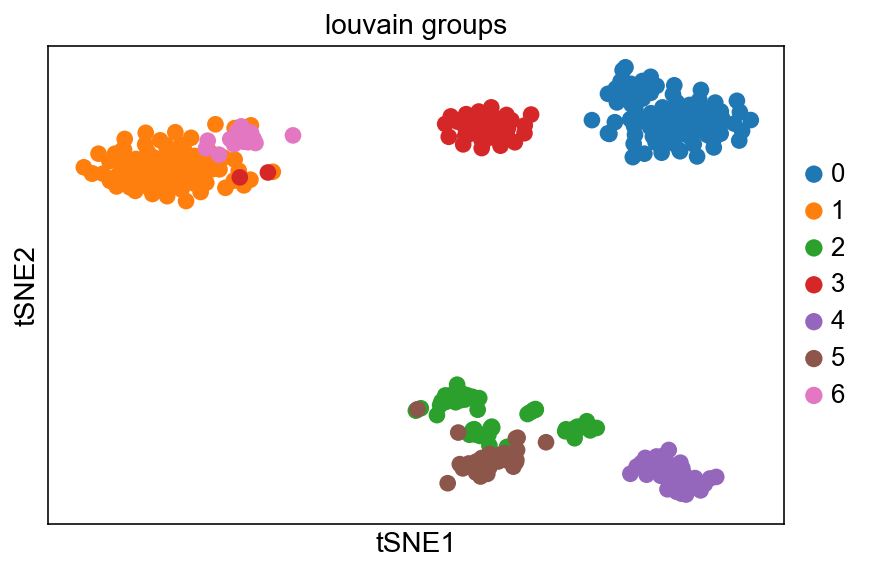

In [4]:
batch_names = list(set(adata.smp['batch']))
#separate data by batch
#creates local clusters per batch
split_data = []
for b in batch_names:
    qdata = adata[adata.smp['batch'] == b,:]
    sc.pp.pca(qdata,n_comps=50)
    sc.tl.louvain(qdata, resolution=2.0)
    sc.tl.tsne(qdata,n_jobs=8)
    sc.pl.tsne(qdata,color=['louvain_groups'])
    split_data.append(qdata)

In [6]:
#reassign clusters to adata
#each local cluster gets a different number
adj = 0
tiss_meta['split_groups'] = np.nan
for qdata in split_data:
    q = pd.DataFrame(qdata.smp['louvain_groups'],index=qdata.smp_names,columns=['split_groups'])
    q['split_groups'] = pd.to_numeric(q['split_groups']) + adj
    adj += len(set(q['split_groups']))
    tiss_meta.loc[q.index.values,'split_groups'] = q['split_groups'].apply(str)

computing tSNE
    preprocess using PCA with 50 PCs
    using 50 principal components
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:00:31.226) and added
    "X_tsne", tSNE coordinates (adata.smp)
... updating the color palette to provide enough colors


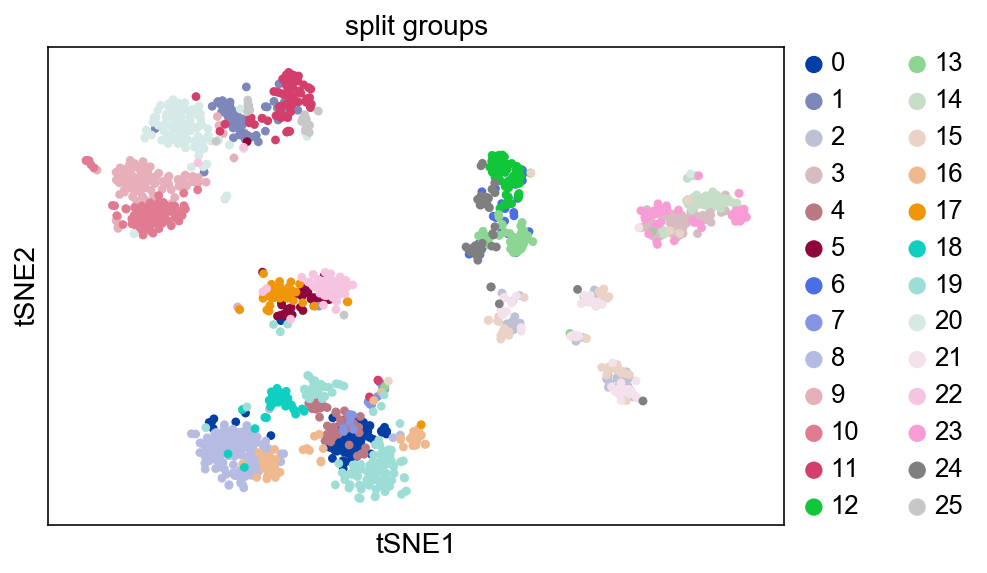

In [7]:
#plot all local clusters
tiss_meta = tiss_meta.reindex(adata.smp_names)
adata.smp['split_groups'] = tiss_meta['split_groups']
sc.tl.tsne(adata,n_jobs=8)
sc.pl.tsne(adata,color=['split_groups'])

running Louvain clustering
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9967108965  0.9884115458  0.9856470823  0.9750801325
      0.9582740068  0.9537521005  0.9248774648  0.9192302227  0.9113215804
      0.9043889642  0.8828443885  0.8635857701  0.8445371389  0.8285733461]
    using the "louvain" package of Traag (2017)
    finished (0:00:01.261) and found 11 clusters, added
    "louvain_groups", the cluster labels (adata.smp)
    "louvain_groups_order", the unique cluster labels (adata.add)


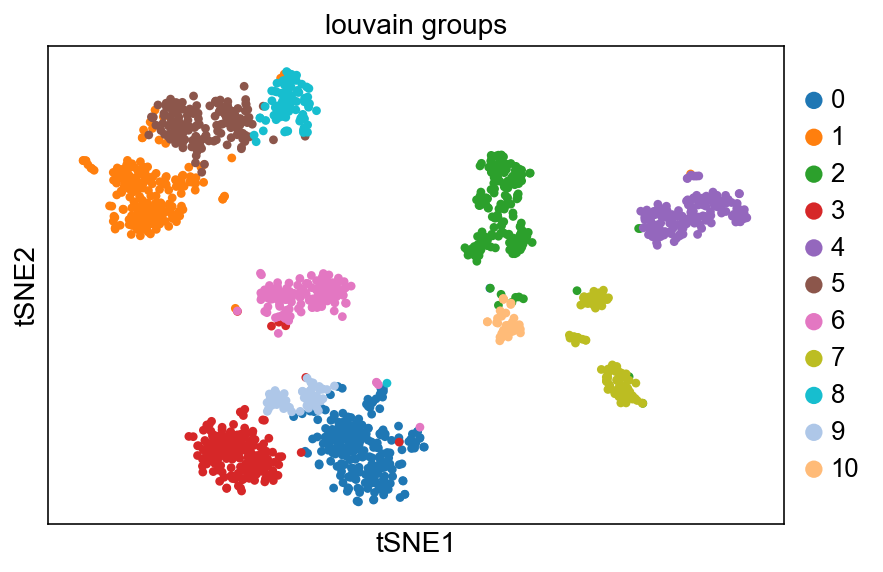

In [8]:
#plot global clusters
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain_groups'])

In [9]:
#sc.tl.rank_genes_groups(adata, 'louvain_groups')
#gene_groups = pd.DataFrame(adata.add['rank_genes_groups_gene_names'])
#just use the groups from R

annotation = pd.read_csv('pancreas_annotation.csv',names=['sample_names','cell_type'],index_col=0)
annotation.index = annotation.index.str.replace(".","-")
annotation = annotation.reindex(adata.smp_names)
adata.smp['R_cell_type'] = annotation['cell_type']

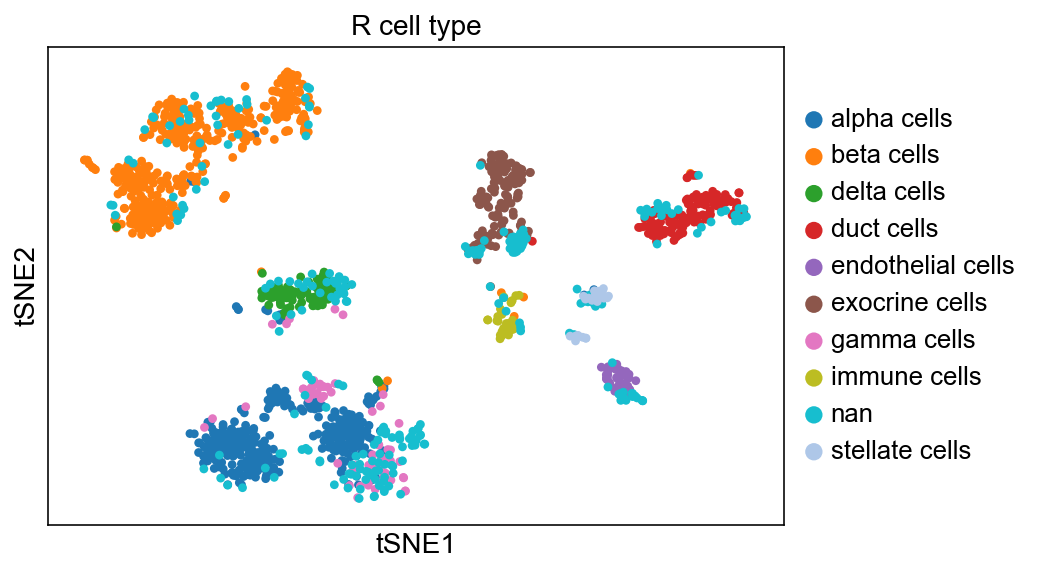

In [10]:
#annotation according to R seurat
sc.pl.tsne(adata,color=['R_cell_type'])

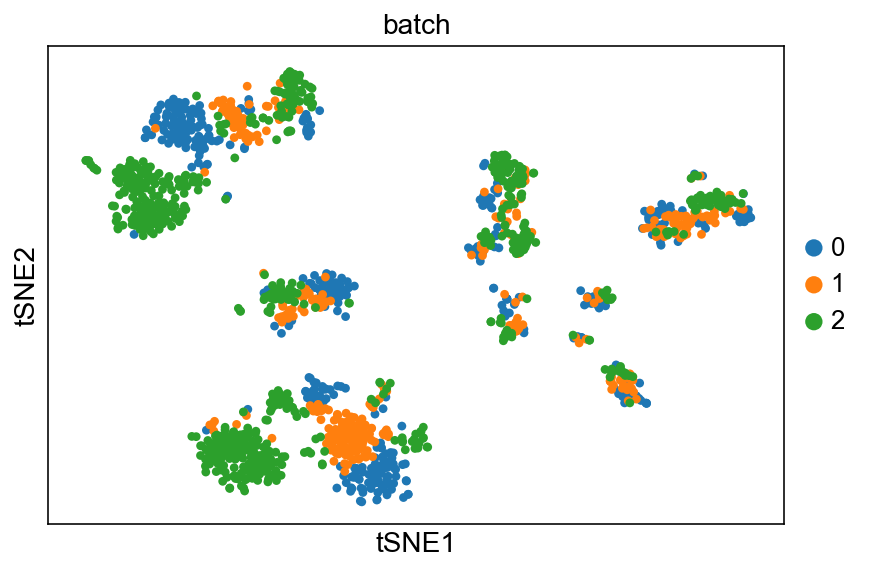

In [11]:
#plot batches
sc.pl.tsne(adata,color=['batch'])